In [1]:
import spacy

In [2]:
spacy.cli.download('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
nlp = spacy.load('en_core_web_sm')

# Tokenization

In [4]:
doc = nlp("Apple is looking to buy UK startup for $1 billion")

In [5]:
doc

Apple is looking to buy UK startup for $1 billion

In [6]:
for i in doc:
    print(i.text)   

Apple
is
looking
to
buy
UK
startup
for
$
1
billion


# Adding special case tokenization rule

In [4]:
from spacy.symbols import ORTH

In [8]:
doc2 = nlp("gimme that")
doc2

gimme that

In [9]:
for token in doc2:
    print(token.text)

gimme
that


In [12]:
special_case = [{ORTH: "gim"}, {ORTH: "me"}]

In [13]:
special_case

[{65: 'gim'}, {65: 'me'}]

In [14]:
nlp.tokenizer.add_special_case("gimme", special_case)

In [15]:
for token in nlp("gimme that"):
    print(token.text)

gim
me
that


# Parts Of Speech(POS)

In [5]:
from spacy import displacy

In [17]:
doc3 = nlp("Python is a programming language. Current year is 2024. Dollar symbol is $")
doc3

Python is a programming language. Current year is 2024. Dollar symbol is $

In [18]:
for token in doc3:
    print(token.text)

Python
is
a
programming
language
.
Current
year
is
2024
.
Dollar
symbol
is
$


In [19]:
for token in doc3:
    print(token, "->", token.pos_)

Python -> PROPN
is -> AUX
a -> DET
programming -> NOUN
language -> NOUN
. -> PUNCT
Current -> ADJ
year -> NOUN
is -> AUX
2024 -> NUM
. -> PUNCT
Dollar -> NOUN
symbol -> NOUN
is -> AUX
$ -> SYM


In [20]:
for token in doc3:
    print(token, "->", token.pos)

Python -> 96
is -> 87
a -> 90
programming -> 92
language -> 92
. -> 97
Current -> 84
year -> 92
is -> 87
2024 -> 93
. -> 97
Dollar -> 92
symbol -> 92
is -> 87
$ -> 99


We see that dollar symbol both have number 92 -> ie they both are noun(same pos) and noun is denoted by number 92

In [21]:
displacy.serve(doc3, style="dep") #to display in form of chart

C:\Users\Vedant Kesharia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



# Stopwords

In [6]:
from spacy.lang.en.stop_words import STOP_WORDS

In [7]:
print(STOP_WORDS)

{'side', 'twenty', 'top', 'forty', 'put', 'which', 'any', 'his', 'nor', 'nevertheless', 'due', 'hereafter', 'ca', 'of', 'seem', 'in', 'other', 'whenever', 'the', 'would', 'out', '‘ve', 'always', 'various', 'though', 'still', 'there', 'within', 'beforehand', 'to', 'with', 'if', 'nobody', 'see', 'first', 'from', 'he', "'m", 'much', 'fifteen', 'nothing', 'say', 'sixty', "'d", 'else', 'everyone', 'really', 'anything', 'under', 'does', 'make', 'after', "n't", 'full', 'only', '’ll', 'yet', 'none', 're', 'three', '‘re', 'wherein', 'hence', 'beyond', 'get', 'even', 'anyway', 'up', 'namely', 'becoming', 'off', 'hereby', '’re', 'further', 'since', 'without', 'your', 'both', 'either', 'so', 'them', 'others', 'i', 'against', 'neither', 'between', 'six', 'alone', 'whither', 'nowhere', 'for', 'thereupon', 'behind', 'below', 'part', 'herein', '‘ll', 'take', 'be', 'has', 'often', 'unless', 'became', 'here', 'thence', 'were', '‘s', 'indeed', 'hereupon', 'might', 'anywhere', 'an', '‘m', "'ve", 'over', "

In [9]:
"in" in STOP_WORDS #as "in" is a stop word it prints True

True

In [10]:
"apple" in STOP_WORDS #as "apple" is a not a stop word it prints False

False

In [11]:
nlp.vocab['apple'].is_stop #other method to check if a word is a stop word

False

In [12]:
doc4 = nlp("Python is a programming language. I am learning Natural Language Processing")

In [13]:
doc4

Python is a programming language. I am learning Natural Language Processing

In [14]:
for token in doc4:
    print(token.text)

Python
is
a
programming
language
.
I
am
learning
Natural
Language
Processing


In [16]:
for token in doc4:
    if token.is_stop == True: #if token is a stop word
        print(token.text)

is
a
I
am


In [17]:
for token in doc4:
    if token.is_stop == False: #if token is not a stop word
        print(token.text)

Python
programming
language
.
learning
Natural
Language
Processing


# Name Entity Recognition

In [18]:
doc5 = nlp("Apple is looking at buying U.K. startup for $1 billion")
doc5

Apple is looking at buying U.K. startup for $1 billion

In [19]:
for token in doc5:
    print(token.text, "->", token.pos_)

Apple -> PROPN
is -> AUX
looking -> VERB
at -> ADP
buying -> VERB
U.K. -> PROPN
startup -> NOUN
for -> ADP
$ -> SYM
1 -> NUM
billion -> NUM


In [21]:
from spacy import displacy

In [22]:
displacy.render(doc5,style="ent",jupyter=True) #ent means entity

We see that entities are highlighted in different colors

In [24]:
for entity in doc5.ents:
    if entity.label_=='ORG':
        print(entity.text)

Apple


# Lemmatization


Lemmatization is a linguistic process that involves reducing words to their base or root form, known as the lemma. The goal is to group together different forms of a word so they can be analyzed as a single item. This helps in tasks like text analysis, information retrieval, and natural language processing.

For example, consider the words "running," "ran," and "runs." The lemma for all these words is "run." Lemmatization would convert all these variations to the base form "run."

In [28]:
doc6 = nlp("I am recording videos")
doc6

I am recording videos

In [29]:
for token in doc6:
    print(token.text)

I
am
recording
videos


In [30]:
for token in doc6:
    print(token.lemma_)

I
be
record
video


In [32]:
doc7 = nlp("He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun.")
doc7

He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun.

In [33]:
for token in doc7:
    print(token.lemma_)

he
be
run
and
eat
at
same
time
.
he
have
bad
habit
of
swimming
after
play
long
hour
in
the
Sun
.


# Most Frequent Words

In [34]:
import nltk

In [40]:
from goose3 import Goose

In [43]:
g = Goose()

In [41]:
url = "https://en.wikipedia.org/wiki/Data_science"

In [42]:
url

'https://en.wikipedia.org/wiki/Data_science'

In [45]:
article = g.extract(url=url)

In [46]:
article

In [47]:
article.cleaned_text

'Interdisciplinary field of study on deriving knowledge and insights from data\n\nData science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.[2]\n\nData science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).[3] Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.[4]\n\nData science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data.[5] It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge.[6] However, data scie

In [48]:
tokens = nltk.tokenize.word_tokenize(article.cleaned_text)

In [49]:
tokens

['Interdisciplinary',
 'field',
 'of',
 'study',
 'on',
 'deriving',
 'knowledge',
 'and',
 'insights',
 'from',
 'data',
 'Data',
 'science',
 'is',
 'an',
 'interdisciplinary',
 'academic',
 'field',
 '[',
 '1',
 ']',
 'that',
 'uses',
 'statistics',
 ',',
 'scientific',
 'computing',
 ',',
 'scientific',
 'methods',
 ',',
 'processes',
 ',',
 'algorithms',
 'and',
 'systems',
 'to',
 'extract',
 'or',
 'extrapolate',
 'knowledge',
 'and',
 'insights',
 'from',
 'potentially',
 'noisy',
 ',',
 'structured',
 ',',
 'or',
 'unstructured',
 'data',
 '.',
 '[',
 '2',
 ']',
 'Data',
 'science',
 'also',
 'integrates',
 'domain',
 'knowledge',
 'from',
 'the',
 'underlying',
 'application',
 'domain',
 '(',
 'e.g.',
 ',',
 'natural',
 'sciences',
 ',',
 'information',
 'technology',
 ',',
 'and',
 'medicine',
 ')',
 '.',
 '[',
 '3',
 ']',
 'Data',
 'science',
 'is',
 'multifaceted',
 'and',
 'can',
 'be',
 'described',
 'as',
 'a',
 'science',
 ',',
 'a',
 'research',
 'paradigm',
 ',',
 '

Now we find most frequent words

In [50]:
frequency = nltk.FreqDist(tokens)

In [51]:
frequency

FreqDist({',': 118, 'and': 80, 'data': 79, '.': 63, '[': 51, ']': 51, 'the': 47, 'science': 44, 'of': 36, 'to': 35, ...})

In [54]:
most_common = frequency.most_common(20) #to get top 20 most frequent words

In [55]:
most_common

[(',', 118),
 ('and', 80),
 ('data', 79),
 ('.', 63),
 ('[', 51),
 (']', 51),
 ('the', 47),
 ('science', 44),
 ('of', 36),
 ('to', 35),
 ('a', 33),
 ('Data', 21),
 ('in', 21),
 ('is', 19),
 ('statistics', 19),
 ('that', 18),
 ('as', 18),
 ('analysis', 18),
 ('from', 17),
 ('``', 14)]

We now make a Word Cloud

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [58]:
cloud = WordCloud()

In [59]:
cloud = cloud.generate(article.cleaned_text)

In [60]:
cloud

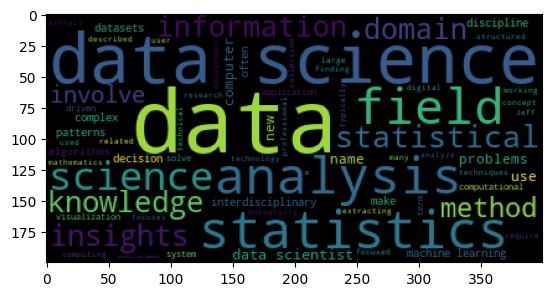

In [61]:
plt.imshow(cloud)

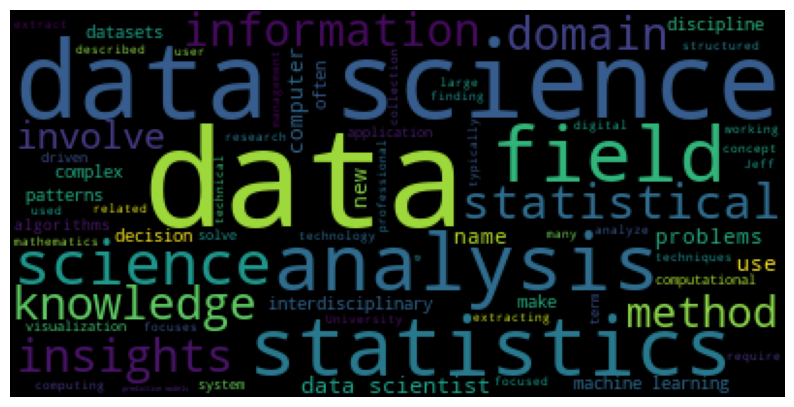

In [65]:
plt.figure(figsize=(10,10))
plt.imshow(cloud)
plt.axis("off");

# Word Similarity

In [66]:
g1 = nlp("hi")

In [67]:
g2 = nlp("hello")

In [68]:
g1

hi

In [69]:
g2

hello

In [70]:
g1.similarity(g2)

C:\Users\Vedant Kesharia\AppData\Local\Temp\ipykernel_8040\1516339412.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  g1.similarity(g2)


0.7161104995803708

In [71]:
g2.similarity(g1)

C:\Users\Vedant Kesharia\AppData\Local\Temp\ipykernel_8040\2904518517.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  g2.similarity(g1)


0.7161104995803708

**It means "hi" and "hello" are 71% similar to each other**

In [72]:
g3 = nlp("Science")

In [73]:
g3

Science

In [74]:
g3.similarity(g1)

C:\Users\Vedant Kesharia\AppData\Local\Temp\ipykernel_8040\1138585424.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  g3.similarity(g1)


0.28748563162447976

**It means "hi" and "Science" are 28% similar to each other**

In [75]:
g3.similarity(g2)

C:\Users\Vedant Kesharia\AppData\Local\Temp\ipykernel_8040\3548851985.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  g3.similarity(g2)


0.35661168808867927

In [76]:
s1 = nlp("NLP is useful for dealing with text")

In [77]:
s2 = nlp("spacy is part of nlp which is used for ext analysis")

In [78]:
s3 = nlp("I like movies")

In [79]:
s1.similarity(s2)

C:\Users\Vedant Kesharia\AppData\Local\Temp\ipykernel_8040\2578066249.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  s1.similarity(s2)


0.6080003899689523

In [80]:
s1.similarity(s3)

C:\Users\Vedant Kesharia\AppData\Local\Temp\ipykernel_8040\2854249872.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  s1.similarity(s3)


0.08220859058660014

In [81]:
s2.similarity(s3)

C:\Users\Vedant Kesharia\AppData\Local\Temp\ipykernel_8040\1388493280.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  s2.similarity(s3)


0.09727017655713574

# Sentence Segmentation

In [83]:
doc8 = nlp("This is our first sentence. This is another sentence. This is the last sentence.")

In [84]:
doc8

This is our first sentence. This is another sentence. This is the last sentence.

In [86]:
for sent in doc8.sents:
    print(sent.text)

This is our first sentence.
This is another sentence.
This is the last sentence.


It breaks down based on full stops. It classifies the sentence after aa full stop as new sentence